In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input_size = 784 #28*28
num_classes = 10
batch_size = 1000

In [3]:
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [4]:
# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### Conv -> MaxPool -> ReLu -> Conv -> MaxPool -> ReLu -> FC

28*28*3 -> 28*28*8 -> 14*14*8 -> 14*14*16 -> 7*7*16

In [8]:
#inplace = 1 - B&W

class CNN_(nn.Module):
    def __init__(self, inplanes=1, planes1=16, planes2=32, stride=1):
        super(CNN_, self).__init__()

        self.layer1 = nn.Sequential(nn.Conv2d(inplanes, planes1, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(16),
                                    nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.layer2 = nn.Sequential(nn.Conv2d(planes1, planes2, kernel_size=3, stride=1, padding=1), 
                                    nn.ReLU(),
                                    nn.BatchNorm2d(32),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        #self.drop_out = nn.Dropout() 
        self.fc1 = nn.Linear(7 * 7 * planes2, 32) # 14*14*16
        self.fc2 = nn.Linear(32, 10)
    def forward(self, x): 
        out = self.layer1(x) 
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        #out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [9]:
num_epochs = 5
weight_decay = 0.01
momentum = 0.9
learning_rate = 0.01

model = CNN_()
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss() объединяет и SoftMax, и кросс-энтропийную функцию потерь
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)

total_step = len(train_loader)
loss_list = []
acc_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images
        labels = labels
        
        # Прямой запуск
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Обратное распространение и оптимизатор
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Отслеживание точности
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 20 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.8f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total)))

Epoch [1/5], Step [20/60], Loss: 0.5218, Accuracy: 0.86300000%
Epoch [1/5], Step [40/60], Loss: 0.2263, Accuracy: 0.93100000%
Epoch [1/5], Step [60/60], Loss: 0.1485, Accuracy: 0.95800000%
Epoch [2/5], Step [20/60], Loss: 0.1225, Accuracy: 0.96100000%
Epoch [2/5], Step [40/60], Loss: 0.0998, Accuracy: 0.97500000%
Epoch [2/5], Step [60/60], Loss: 0.0920, Accuracy: 0.97700000%
Epoch [3/5], Step [20/60], Loss: 0.1121, Accuracy: 0.96600000%
Epoch [3/5], Step [40/60], Loss: 0.0880, Accuracy: 0.97700000%
Epoch [3/5], Step [60/60], Loss: 0.1218, Accuracy: 0.97000000%
Epoch [4/5], Step [20/60], Loss: 0.0694, Accuracy: 0.98100000%
Epoch [4/5], Step [40/60], Loss: 0.0983, Accuracy: 0.96900000%
Epoch [4/5], Step [60/60], Loss: 0.0614, Accuracy: 0.98700000%
Epoch [5/5], Step [20/60], Loss: 0.0854, Accuracy: 0.98000000%
Epoch [5/5], Step [40/60], Loss: 0.0825, Accuracy: 0.97700000%
Epoch [5/5], Step [60/60], Loss: 0.0788, Accuracy: 0.97900000%


In [37]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 97.94 %


# #2

In [25]:
#inplace = 1 - B&W

class CNN_2(nn.Module):
    def __init__(self, inplanes=1, planes1=16, planes2=32, stride=1):
        super(CNN_2, self).__init__()

        self.layer1 = nn.Sequential(nn.Conv2d(inplanes, planes1, kernel_size=5, stride=1, padding=2),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(16),
                                    nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.layer2 = nn.Sequential(nn.Conv2d(planes1, planes2, kernel_size=5, stride=1, padding=2), 
                                    nn.ReLU(),
                                    nn.BatchNorm2d(32),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        #self.drop_out = nn.Dropout() 
        self.fc1 = nn.Linear(7 * 7 * planes2, 32) # 14*14*16
        self.fc2 = nn.Linear(32, 10)
    def forward(self, x): 
        out = self.layer1(x) 
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        #out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [27]:
num_epochs = 5
weight_decay = 0.01
momentum = 0.9
learning_rate = 0.001

model = CNN_2()
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss() объединяет и SoftMax, и кросс-энтропийную функцию потерь
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)

total_step = len(train_loader)
loss_list2 = []
acc_list2 = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images
        labels = labels
        
        # Прямой запуск
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list2.append(loss.item())

        # Обратное распространение и оптимизатор
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Отслеживание точности
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list2.append(correct / total)

        if (i + 1) % 20 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.8f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total)))

Epoch [1/5], Step [20/60], Loss: 1.8168, Accuracy: 0.58500000%
Epoch [1/5], Step [40/60], Loss: 1.2423, Accuracy: 0.76400000%
Epoch [1/5], Step [60/60], Loss: 0.8134, Accuracy: 0.87000000%
Epoch [2/5], Step [20/60], Loss: 0.6174, Accuracy: 0.90800000%
Epoch [2/5], Step [40/60], Loss: 0.4898, Accuracy: 0.90800000%
Epoch [2/5], Step [60/60], Loss: 0.3961, Accuracy: 0.91900000%
Epoch [3/5], Step [20/60], Loss: 0.3218, Accuracy: 0.94100000%
Epoch [3/5], Step [40/60], Loss: 0.3088, Accuracy: 0.92600000%
Epoch [3/5], Step [60/60], Loss: 0.2923, Accuracy: 0.93200000%
Epoch [4/5], Step [20/60], Loss: 0.2422, Accuracy: 0.95200000%
Epoch [4/5], Step [40/60], Loss: 0.2417, Accuracy: 0.94200000%
Epoch [4/5], Step [60/60], Loss: 0.2301, Accuracy: 0.94200000%
Epoch [5/5], Step [20/60], Loss: 0.1833, Accuracy: 0.95300000%
Epoch [5/5], Step [40/60], Loss: 0.1969, Accuracy: 0.95800000%
Epoch [5/5], Step [60/60], Loss: 0.1547, Accuracy: 0.95900000%


In [30]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 95.96 %


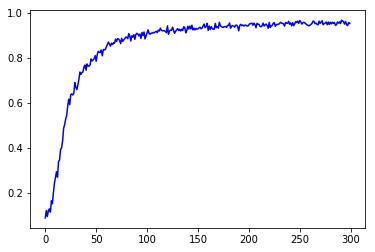

In [38]:
plt.plot(range(num_epochs*len(train_loader)), acc_list[0:300], 'b')
pass

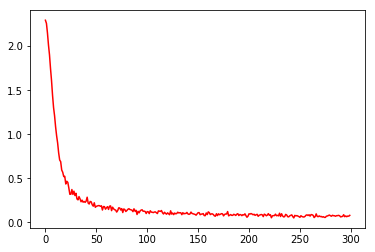

In [20]:
plt.plot(range(num_epochs*len(train_loader)), loss_list, 'r')
pass